# Exploratory Data Analysis – Jet Diameter Prediction

This notebook performs an exploratory analysis of the jet simulation dataset used to develop machine learning models for predicting jet diameters. The data includes spatial dispersion of particles, pressure, velocity, and a computed diameter for each particle group.

We will explore:
- The distribution of physical variables (velocity, pressure)
- The behavior of computed diameter
- Correlation between variables
- Trends across the jet propagation axis (X)
- Detection of potential outliers

In [1]:
!pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style settings
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)

## Load the dataset

We start by loading the preprocessed dataset that contains both the original physical measurements (X, Y, Z, pressure, velocity) and computed features (diameter, average pressure/velocity).

We will also inspect its structure to check for missing values and column types.


In [3]:
# Load dataset
df = pd.read_csv("../data/processed/dataset.csv")  # ajuste se estiver fora do src/

# Show general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X [ m ]              11040 non-null  float64
 1   Y [ m ]              11040 non-null  float64
 2   Z [ m ]              11040 non-null  float64
 3   Pressure [ atm ]     11040 non-null  float64
 4   Velocity [ m s^-1 ]  11040 non-null  float64
 5   simulation_id        11040 non-null  int64  
 6   D_in_mm              11040 non-null  float64
 7   current_diameter     11040 non-null  float64
 8   time_step            11040 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 776.4 KB


In [4]:
df.describe()

,X [ m ],Y [ m ],Z [ m ],Pressure [ atm ],Velocity [ m s^-1 ],simulation_id,D_in_mm,current_diameter,time_step
count,11040.000000,11040.000000,11040.000000,1.104000e+04,11040.000000,11040.00000,11040.00000,11040.000000,11040.000000
mean,0.045500,0.143878,0.008903,4.637669e-05,6.850013,103.50000,5.00000,5.288306,23.500000
std,0.028724,0.084821,0.005248,4.047007e-04,37.249504,59.77101,1.32671,1.337553,13.854027
min,0.000500,0.000000,0.000000,-4.997279e-03,0.002982,0.00000,2.80000,2.800000,0.000000
25%,0.020500,0.071939,0.004451,-3.982919e-06,0.281326,52.00000,3.80000,4.138592,11.750000
50%,0.045500,0.143878,0.008903,-8.186767e-07,0.527467,103.50000,5.00000,5.288306,23.500000
75%,0.070500,0.215816,0.013354,-1.148552e-07,1.033610,155.00000,6.20000,6.438019,35.250000
max,0.090500,0.287755,0.017806,8.444554e-03,322.750488,207.00000,7.20000,7.776611,47.000000


In [6]:
from sklearn.neighbors import NearestNeighbors

features = ["X [ m ]", "Y [ m ]", "Pressure [ atm ]", "time_step", "D_in_mm"]
X = df[features]

nn = NearestNeighbors(n_neighbors=5)
nn.fit(X)

ponto = [[0.04, 0.15, 0.001, 20, 4.6]]
dist, idx = nn.kneighbors(ponto)

print(dist)
df.iloc[idx[0]][features + ["Velocity [ m s^-1 ]", "current_diameter"]]


[[0.02757376 0.02916012 0.02950106 0.03376852 0.03435567]]


D:\tools\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,X [ m ],Y [ m ],Pressure [ atm ],time_step,D_in_mm,Velocity [ m s^-1 ],current_diameter
4580,0.0405,0.122449,-0.000002,20,4.6,0.598972,4.845366
4532,0.0305,0.122449,-0.000002,20,4.6,0.591116,4.845366
4628,0.0505,0.122449,-0.000001,20,4.6,0.608278,4.845366
4484,0.0205,0.122449,-0.000002,20,4.6,0.585109,4.845366
4676,0.0605,0.122449,-0.000001,20,4.6,0.618607,4.845366


## Preview of the dataset

Let's take a look at the first few rows of the dataset to better understand the structure and values involved.


In [5]:
df.head()

,X [ m ],Y [ m ],Z [ m ],Pressure [ atm ],Velocity [ m s^-1 ],simulation,D_in_mm,current_diameter,time_step
0,0.0005,0.000000,0.000000,0.003396,320.000000,1.0,2.8,2.800000,0
1,0.0005,0.006122,0.000379,-0.000120,4.540900,1.0,2.8,2.812268,1
2,0.0005,0.012245,0.000758,-0.000037,2.524638,1.0,2.8,2.824537,2
3,0.0005,0.018367,0.001137,-0.000020,1.839346,1.0,2.8,2.836805,3
4,0.0005,0.024490,0.001515,-0.000013,1.469237,1.0,2.8,2.849073,4


## Missing values check

We will now verify whether there are any missing or invalid entries that could affect downstream analysis.

In [6]:
df.isnull().sum()

X [ m ]                0
Y [ m ]                0
Z [ m ]                0
Pressure [ atm ]       0
Velocity [ m s^-1 ]    0
simulation             0
D_in_mm                0
current_diameter       0
time_step              0
dtype: int64

## Distribution of physical variables

Understanding the distribution of each feature is critical before applying machine learning. We will plot histograms of:

- Computed jet diameter
- Average group pressure
- Average group velocity
- Individual particle pressure
- Individual particle velocity

These plots help us detect skewness, outliers, or normalization needs.

KeyError: 'diameter'

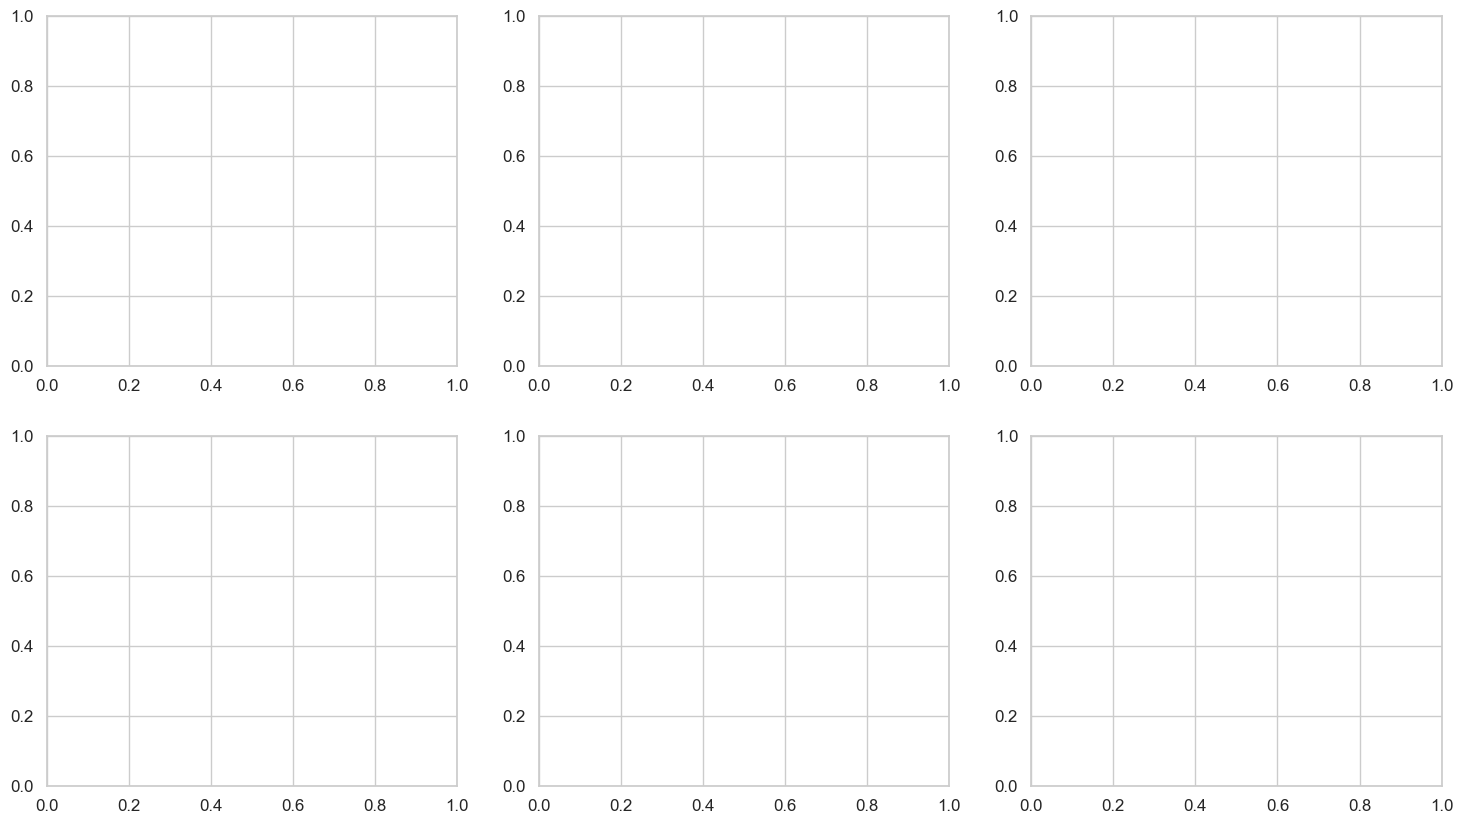

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histogram of computed diameter
sns.histplot(df['diameter'], kde=True, ax=axes[0, 0], color='dodgerblue')
axes[0, 0].set_title("Computed Jet Diameter")

# Histogram of average pressure
sns.histplot(df['avg_pressure'], kde=True, ax=axes[0, 1], color='darkorange')
axes[0, 1].set_title("Average Pressure per Group")

# Histogram of average velocity
sns.histplot(df['avg_velocity'], kde=True, ax=axes[0, 2], color='seagreen')
axes[0, 2].set_title("Average Velocity per Group")

# Histogram of particle pressure
sns.histplot(df['Pressure [ atm ]'], kde=True, ax=axes[1, 0], color='tomato')
axes[1, 0].set_title("Particle Pressure")

# Histogram of particle velocity
sns.histplot(df['Velocity [ m s^-1 ]'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title("Particle Velocity")

# Hide last unused subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## Outlier detection with boxplots

We will now use boxplots to visually identify outliers in the key continuous variables.

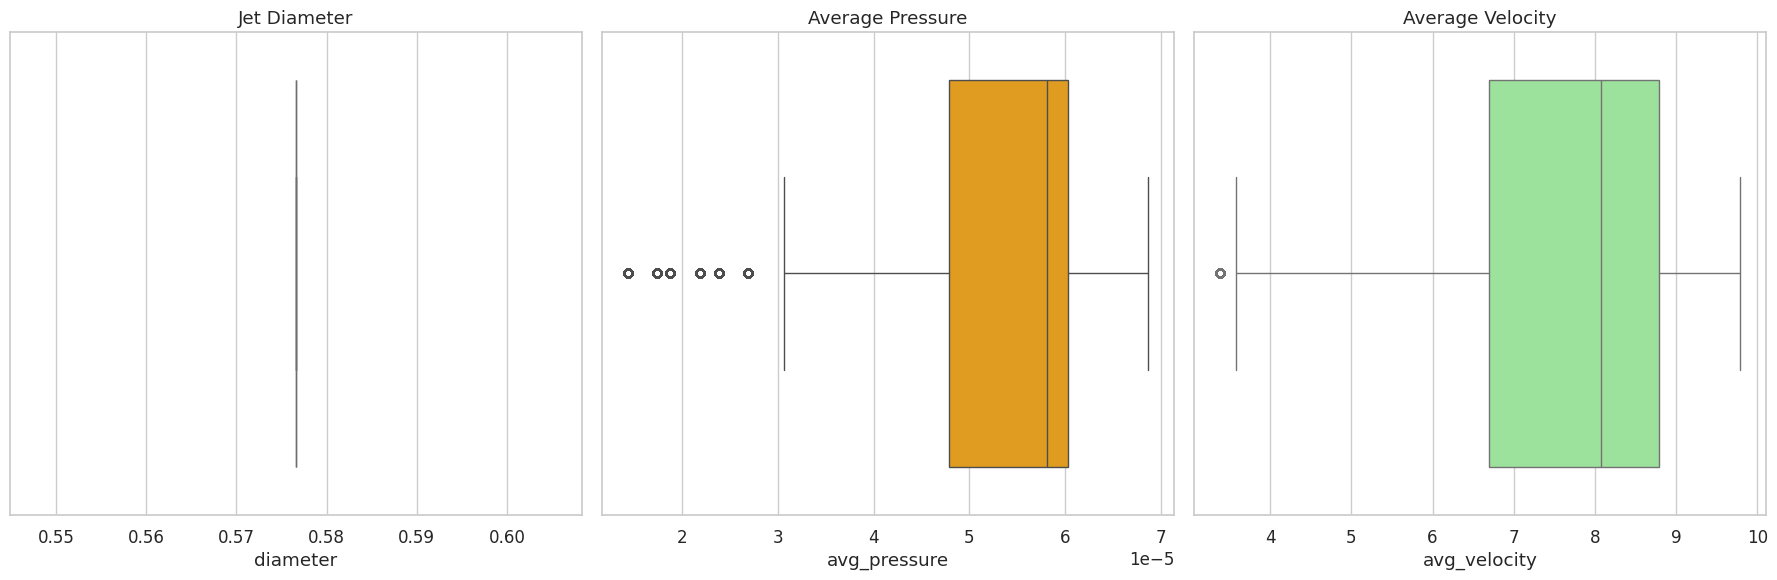

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x=df['diameter'], ax=axes[0], color='skyblue')
axes[0].set_title("Jet Diameter")

sns.boxplot(x=df['avg_pressure'], ax=axes[1], color='orange')
axes[1].set_title("Average Pressure")

sns.boxplot(x=df['avg_velocity'], ax=axes[2], color='lightgreen')
axes[2].set_title("Average Velocity")

plt.tight_layout()
plt.show()


## Correlation heatmap

Let's examine the correlation matrix for the main numerical features. This helps us understand which variables are most related to the computed jet diameter and potentially redundant with each other.

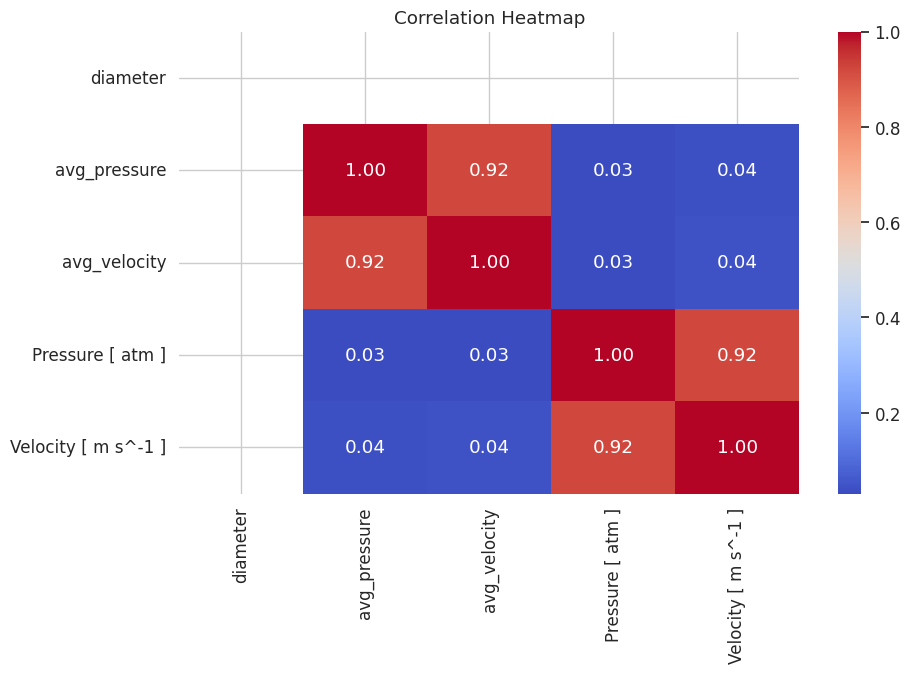

In [12]:
# Selecionar apenas colunas numéricas relevantes
corr_features = df[[
    "diameter", 
    "avg_pressure", 
    "avg_velocity", 
    "Pressure [ atm ]", 
    "Velocity [ m s^-1 ]"
]]

# Calcular correlação
corr_matrix = corr_features.corr()

# Exibir heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Scatter plots – Variable relationships with diameter

Next, we visualize scatter plots of relevant variables against `diameter`. These plots help identify trends and the strength/form of each relationship (linear, non-linear, weak, etc.).

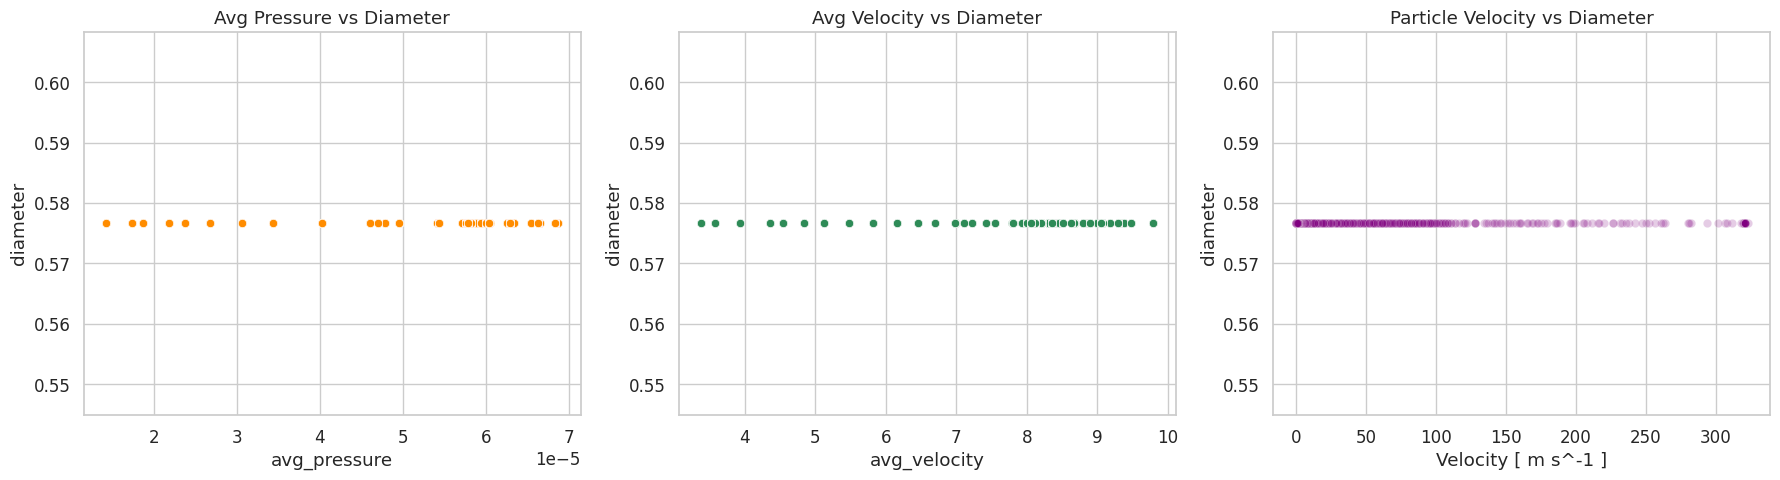

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# avg_pressure vs diameter
sns.scatterplot(data=df, x='avg_pressure', y='diameter', ax=axes[0], color='darkorange')
axes[0].set_title("Avg Pressure vs Diameter")

# avg_velocity vs diameter
sns.scatterplot(data=df, x='avg_velocity', y='diameter', ax=axes[1], color='seagreen')
axes[1].set_title("Avg Velocity vs Diameter")

# Velocity (individual) vs diameter
sns.scatterplot(data=df, x='Velocity [ m s^-1 ]', y='diameter', ax=axes[2], alpha=0.2, color='purple')
axes[2].set_title("Particle Velocity vs Diameter")

plt.tight_layout()
plt.show()

## Profile along propagation axis (X)

Now, we investigate how the velocity and diameter change along the X axis (propagation direction of the jet). This gives insight into how the jet spreads and loses momentum.


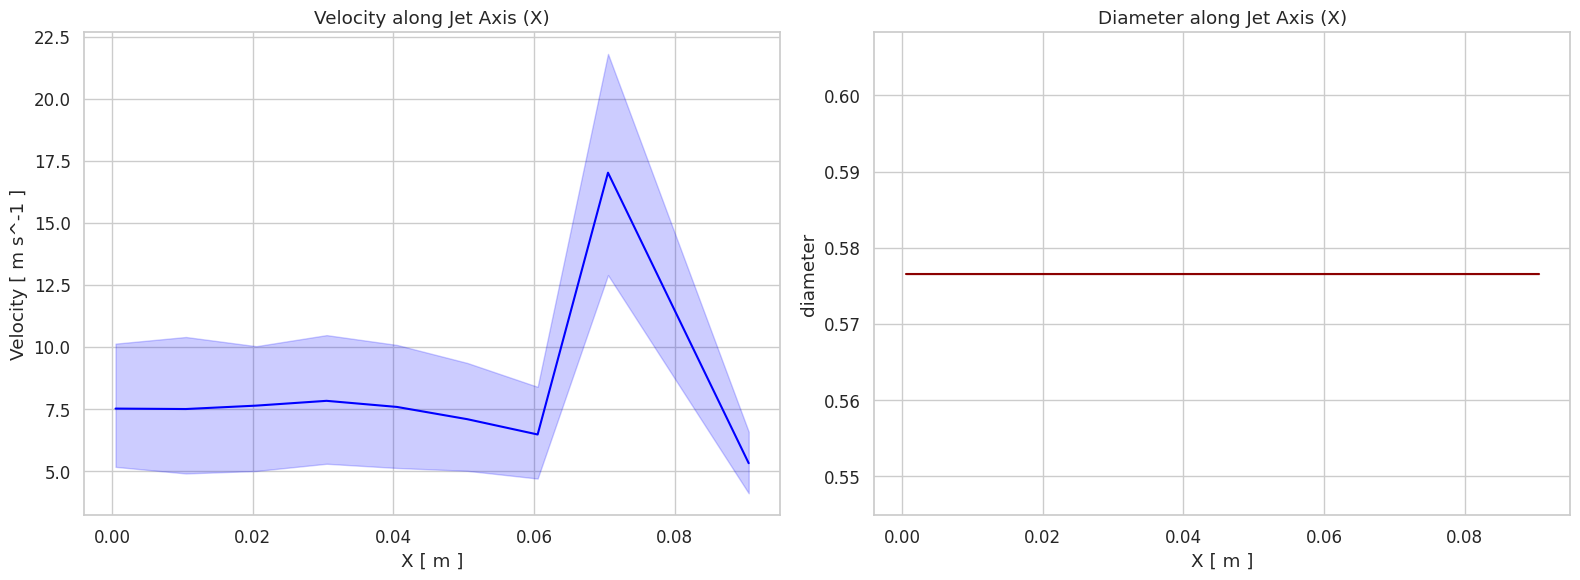

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# X vs Velocity
sns.lineplot(data=df, x='X [ m ]', y='Velocity [ m s^-1 ]', ax=axes[0], color='blue')
axes[0].set_title("Velocity along Jet Axis (X)")

# X vs Diameter
sns.lineplot(data=df, x='X [ m ]', y='diameter', ax=axes[1], color='darkred')
axes[1].set_title("Diameter along Jet Axis (X)")

plt.tight_layout()
plt.show()


## Summary of Insights

From the exploratory analysis above, we observed the following:

1. **Diameter Distribution**:
   - The computed jet diameter shows a smooth, positively skewed distribution.
   - Most jets have diameters within a relatively consistent range, though there are some wider regions.

2. **Pressure and Velocity**:
   - The average group velocity follows a fairly smooth distribution with values that decrease progressively along the jet axis (X), consistent with fluid dispersion and energy dissipation.
   - The average pressure is centered around very low values (close to zero), which may limit its impact as a predictive feature.

3. **Correlations**:
   - `avg_velocity` and `diameter` are moderately correlated, suggesting a relationship between velocity decay and jet spread.
   - `avg_pressure` shows a weaker correlation with diameter, but may still contribute value when combined with other variables.

4. **Scatter Relationships**:
   - Scatter plots reveal a **non-linear but visible relationship** between velocity and diameter.
   - Some saturation or plateau effects can be observed in the upper ranges of velocity.

5. **Jet Axis Analysis (X)**:
   - As expected in jet propagation, both **velocity and diameter change progressively** along the X direction.
   - This confirms that spatial position (X) should be strongly considered in model training, potentially as a feature or by grouping data temporally.

## Next Step – Feature Engineering and Model Training

Based on these insights, the next stage is:

- Select key features for training: likely `avg_velocity`, `avg_pressure`, and `X [m]`.
- Consider normalization or transformation of skewed variables.
- Train a regression model (e.g., Random Forest or XGBoost) to predict `diameter`.
- Evaluate model performance and refine feature selection.

